# DFT

$$
y_k = \frac{1}{\sqrt{N}} \sum^{N-1}_{j=0} \exp{(i\frac{2\pi kj}{N})}x_j
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath as cm
%matplotlib inline

N =  1000


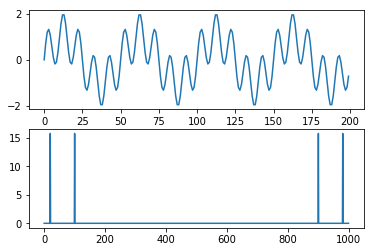

In [2]:
N = 1000 # Num of data points
Ts = 1 / 1000 # 10k sample per 1s
print('N = ',N)
x0 = np.arange(0,N)
x1 = np.sin(2*np.pi * x0 / 10) # sine wave 100 cycle = 100Hz
x2 = np.sin(2*np.pi * x0 / 50) # sine wave 20 cycle = 20Hz
x = x1 + x2

plt.subplot(2, 1, 1)
plt.plot(x[:(np.int(N/5))])

#plt.plot(x0[:1000],x[:1000])

W = np.zeros([N,N]) + 1e-32j

for k in range(N):
    for j in range(0,N):
        W[k][j] = cm.exp(1j * 2*cm.pi*k*j / N)
        
y = abs(np.dot(W,x)) / np.sqrt(N) / (N*Ts) # convert to actual freq.

plt.subplot(2, 1, 2)
plt.plot(y)

(0, 200)

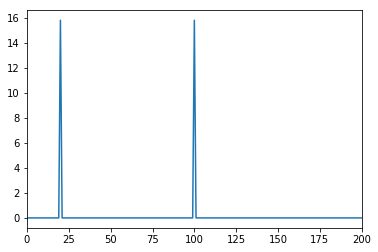

In [3]:
plt.plot(y)
plt.xlim(0, 200)

# 量子フーリエ変換
https://whyitsso.net/physics/quantum_mechanics/QFT.html

$$
|\ x> = \sum^{N-1}_{j=0} x_j\ |\ j>
$$

In [6]:
qubitNum = 4
N = 2**qubitNum

こうしたい
$$
\begin{align}
|\ y> &= \sum^{N-1}_{k=0} y_k\ |\ k>\\
&=\sum^{N-1}_{k=0} [\frac{1}{\sqrt{N}} \sum^{N-1}_{j=0} \exp{(i\frac{2\pi kj}{N})}x_j]\ |\ k>\\
&=\sum^{N-1}_{j=0}x_j\ [\frac{1}{\sqrt{N}} \sum^{N-1}_{k=0} \exp{(i\frac{2\pi kj}{N})}\ |\ k> ]
\end{align}
$$

$|\ k>$がもつ基底の1つ1つにDFTの入力における点1つを割り当てるイメージ。

こうするためには、  
$$
|\ j>\ \to \frac{1}{\sqrt{N}} \sum^{N-1}_{k=0} \exp{(i\frac{2\pi kj}{N})}\ |\ k> 
$$

実は、
$$
\frac{1}{\sqrt{2^n}}(|0>+e^{i2\pi 0.j_0}|1>)(|0>+e^{i2\pi 0.j_1 j_0}|1>)\cdots (|0>+e^{i2\pi 0.j_{n-1} j_{n-2} \cdots j_0}|1>)
$$

In [3]:
import numpy as np

class Qbits:
    def __init__(self, initial):
        self.states = []
        for i in range(len(initial)):
            if initial[i]==1:# |1>
                self.states.append(np.array([0+0j,1+0j]))
            else:
                self.states.append(np.array([1+0j,0+0j]))
    

    def tensorProd(self, a, b):
        dim_a = len(a)
        dim_b = len(b)
        k = np.zeros(dim_a*dim_b) + 0j
        ite = 0
        for i in range(dim_a):
            for j in range(dim_b):
                k[ite] = a[i]*b[j]
                ite += 1
        return k
    
    def outputTensorProduct(self):
        out = self.states[0]
        for i in range(1, len(self.states)):
            out = self.tensorProd(out, self.states[i])
        return out
    
    def Hadamard(self, i):
        H = np.array([[1,1],[1,-1]]) / np.sqrt(2)
        self.states[i] = np.dot(H, self.states[i])
        
    def C_Hadamard(self, c, i):
        if self.states[c] == np.array([1,0]):
            self.Hadamard(i)
            
    def Rphase(self, i, k):
        R = np.array([[1,0],[0,np.exp(1j * np.pi / (2**k))]]) + 0j
        self.states[i] = np.dot(R, self.states[i])
        
    def C_Rphase(self, c, i, k):
        if self.states[c][1] == 1+0j:
            self.Rphase(i, k)
            
    def flipState(self):
        self.states.reverse()
            
def QFT(initial):
    A = Qbits(initial = initial)
    N = len(initial)
    for i in range(N):
        for j in range(i):
            A.C_Rphase(i, j, i-j)
        A.Hadamard(i)
    A.flipState()
    return A.outputTensorProduct()

確認  
|01> (= |2>)を量子フーリエ変換  
N = 4    
j, k = {0,1,2,3}

$$
\begin{align}
|\ j>\ &\to  \frac{1}{\sqrt{N}} \sum^{N-1}_{k=0} \exp{(i\frac{2\pi kj}{N})}\ |\ k> \\
&= \frac{1}{\sqrt{2^n}}(|0>+e^{i2\pi 0.j_0}|1>)(|0>+e^{i2\pi 0.j_1 j_0}|1>)\cdots (|0>+e^{i2\pi 0.j_{n-1} j_{n-2} \cdots j_0}|1>)
\end{align}
$$

In [9]:
import numpy as np

def binToInt(inputState):
    out = 0
    for i in range(len(inputState)):
        out += inputState[-1-i]*  2**i
    return out

def QFT_calc(inputState):
    j = binToInt(inputState)
    N = 2**len(inputState)
    calc = []
    for i in range(N):
        calc.append(1/np.sqrt(N) * np.exp(1j * 2*np.pi *i*j / N))
    return calc

inputState = [1,0]
calc = QFT_calc(inputState)
print(np.round(calc,3))

[ 0.5+0.j -0.5+0.j  0.5-0.j -0.5+0.j]


In [6]:
import numpy as np

class Qbits:
    def __init__(self, initial):
        self.states = []
        for i in range(len(initial)):
            if initial[i]==1:# |1>
                self.states.append(np.array([0+0j,1+0j]))
            else:
                self.states.append(np.array([1+0j,0+0j]))
    

    def tensorProd(self, a, b):
        dim_a = len(a)
        dim_b = len(b)
        k = np.zeros(dim_a*dim_b) + 0j
        ite = 0
        for i in range(dim_a):
            for j in range(dim_b):
                k[ite] = a[i]*b[j]
                ite += 1
        return k
    
    def outputTensorProduct(self):
        out = self.states[0]
        for i in range(1, len(self.states)):
            out = self.tensorProd(out, self.states[i])
        return out
    
    def Hadamard(self, i):
        H = np.array([[1,1],[1,-1]]) / np.sqrt(2)
        self.states[i] = np.dot(H, self.states[i])
        
    def C_Hadamard(self, c, i):
        if self.states[c] == np.array([1,0]):
            self.Hadamard(i)
            
    def Rphase(self, i, k):
        R = np.array([[1,0],[0,np.exp(1j * np.pi / (2**k))]]) + 0j
        self.states[i] = np.dot(R, self.states[i])
        
    def C_Rphase(self, c, i, k):
        if self.states[c][1] == 1+0j:
            self.Rphase(i, k)
            
    def flipState(self):
        self.states.reverse()
            
def QFT(initial):
    A = Qbits(initial = initial)
    N = len(initial)
    for i in range(N):
        for j in range(i):
            A.C_Rphase(i, j, i-j)
        A.Hadamard(i)
    A.flipState()
    return A.outputTensorProduct()

inputState = [1,0]
a = QFT(initial = inputState)
print(np.round(a,3))

[ 0.5+0.j -0.5+0.j  0.5+0.j -0.5+0.j]


In [8]:
inputState = [1,0,1,0]

calc = QFT_calc(inputState)
print(np.round(calc,3))

a = QFT(initial = inputState)
print(np.round(a,3))

[ 0.25 +0.j    -0.177-0.177j  0.   +0.25j   0.177-0.177j -0.25 +0.j
  0.177+0.177j -0.   -0.25j  -0.177+0.177j  0.25 -0.j    -0.177-0.177j
 -0.   +0.25j   0.177-0.177j -0.25 +0.j     0.177+0.177j -0.   -0.25j
 -0.177+0.177j]
[ 0.25 +0.j    -0.177-0.177j  0.   +0.25j   0.177-0.177j -0.25 +0.j
  0.177+0.177j -0.   -0.25j  -0.177+0.177j  0.25 +0.j    -0.177-0.177j
  0.   +0.25j   0.177-0.177j -0.25 +0.j     0.177+0.177j -0.   -0.25j
 -0.177+0.177j]
